In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Importing all the libraries that we would be using**

In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

**Working on a copy of the dataframe so that I do not have to re-read the entire dataset again in order to save memory**


In [ ]:
##import loan.csv file
d=pd.read_csv('/content/drive/Shared drives/OPIM 5512 - Python Project/loan.csv', low_memory=False)
df = d.copy(deep=True)

**Checking if the dataframe has loaded properly**

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Printing the basic statistical details of the dataset**

In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

**Checking the dimensions**

In [ ]:
df.shape

(887379, 74)

*We find that there sre 887,379 records and 74 different columns in the dataset*

**Printing out the column names**

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

**Finding the the count and percentage of values that are missing in the dataframe and printing the columns with null count more than 0 in descending order**

In [ ]:
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

df_null[df_null['Count'] > 0].sort_values(by=['Percent'], ascending=False)

,Count,Percent
dti_joint,886870,99.942640
annual_inc_joint,886868,99.942415
verification_status_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
total_cu_tl,866007,97.591559
inq_fi,866007,97.591559
all_util,866007,97.591559
max_bal_bc,866007,97.591559
open_rv_24m,866007,97.591559


*Dataframe has 74 columns. There are 40 columns that have missing values. The percentage of missing data in many columns are far more than we can work with. So, we'll have to remove columns having a certain percentage of data less than the total data later on.*

In [ ]:
df = df[df.loan_status != 'In Grace Period']
df = df[df.loan_status != 'Late (16-30 days)']
df = df[df.loan_status != 'Issued']
df = df[df.loan_status != 'Late (31-120 days)']

In [ ]:
loan_status_recode = {"loan_status": {'Fully Paid':'good', 'Charged Off':'bad', 'Current':'good', 'Default':'bad', 'Does not meet the credit policy. Status:Fully Paid':'good', 'Does not meet the credit policy. Status:Charged Off':'bad'}} 
df.replace(loan_status_recode, inplace=True) 
Good_Bad_Loan = [1 if i== 'bad' else 0 for i in df['loan_status']]

df['TARGET'] = Good_Bad_Loan 
df['TARGET'].value_counts() 
good_loan = len(df[(df.TARGET == 0)]) 
print('Good/Bad Loan Ratio: %.2f%%' % (good_loan/len(df)*100))

Good/Bad Loan Ratio: 94.50%


#use this code for our initial good bad differentiation
loan_status_recode = {"loan_status": {'Fully Paid':'good', 'Charged Off':'bad', 'Current':'good', 'Default':'bad',
       'Does not meet the credit policy. Status:Fully Paid':'good',
       'Does not meet the credit policy. Status:Charged Off':'bad'}}
df.replace(loan_status_recode, inplace=True)
Good_Bad_Loan = [1 if i== 'bad' else 0 for i in df['loan_status']]

df['TARGET'] = Good_Bad_Loan
df['TARGET'].value_counts()
good_loan =  len(df[(df.TARGET == 0)]) 
print('Good/Bad Loan Ratio: %.2f%%'  % (good_loan/len(df)*100))

In [ ]:
df.drop(['loan_status'], axis=1, inplace = True)

In [ ]:
df_bad = df[df.TARGET == 1]
df_good = df[df.TARGET == 0]

In [ ]:
df_bad.head()
df_bad['open_acc'].mean()

11.044700899947062

In [ ]:
df_good['loan_amnt'].mean()

14741.016802425169

In [ ]:
missing_data = [i for i in df.count()<887379 *0.30]
df.drop(df.columns[missing_data],axis=1,inplace=True)
df.shape

(858718, 54)

In [ ]:
df['purpose_g'] = np.nan

df.loc[(df['purpose'] == 'debt_consolidation')|(df['purpose'] =="credit_card"), 'purpose_g'] = 'debt' 
df.loc[(df['purpose'] == 'home_improvement')|(df['purpose'] =="major_purchase")|
                 (df['purpose'] == 'car')|(df['purpose'] =="house")|
                 (df['purpose'] == 'vacation')|(df['purpose'] =="renewable_energy"),
                 'purpose_g'] = 'personal_major' 
df.loc[(df['purpose'] == 'small_business')|(df['purpose'] =="medical")|
                 (df['purpose'] == 'moving')|(df['purpose'] =="wedding")|
                 (df['purpose'] == 'educational'),
                 'purpose_g'] = 'personal_minor'
df.loc[(df['purpose'] == 'other'), 'purpose_g'] = 'other'

In [ ]:
# create region of residence based on state
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    
df['region'] = df['addr_state'].apply(finding_regions)

# drop rows without region value
df.dropna(subset=['region'],inplace=True)

In [ ]:
df['emp_length'].fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

In [ ]:
df.drop([    'id',
             'member_id',
             'emp_title',
             'title',
             'url',
             'zip_code',
             'verification_status',
             'home_ownership',
             'addr_state',
            'issue_d',
            'last_pymnt_d',
            'last_credit_pull_d',
            'earliest_cr_line', 
            'next_pymnt_d',
              'collection_recovery_fee',
         'funded_amnt','policy_code','pymnt_plan','sub_grade'
         
             ], axis=1, inplace=True)

In [ ]:
df.shape

(858718, 37)

In [ ]:
df_LC = df.filter(['initial_list_status','inq_last_6mths','open_acc','out_prncp','out_prncp_inv','pub_rec','recoveries','revol_bal','revol_util','tot_coll_amt','tot_cur_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','total_rev_hi_lim'])
df_LC.dtypes

initial_list_status     object
inq_last_6mths         float64
open_acc               float64
out_prncp              float64
out_prncp_inv          float64
pub_rec                float64
recoveries             float64
revol_bal              float64
revol_util             float64
tot_coll_amt           float64
tot_cur_bal            float64
total_acc              float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_int          float64
total_rec_late_fee     float64
total_rec_prncp        float64
total_rev_hi_lim       float64
dtype: object

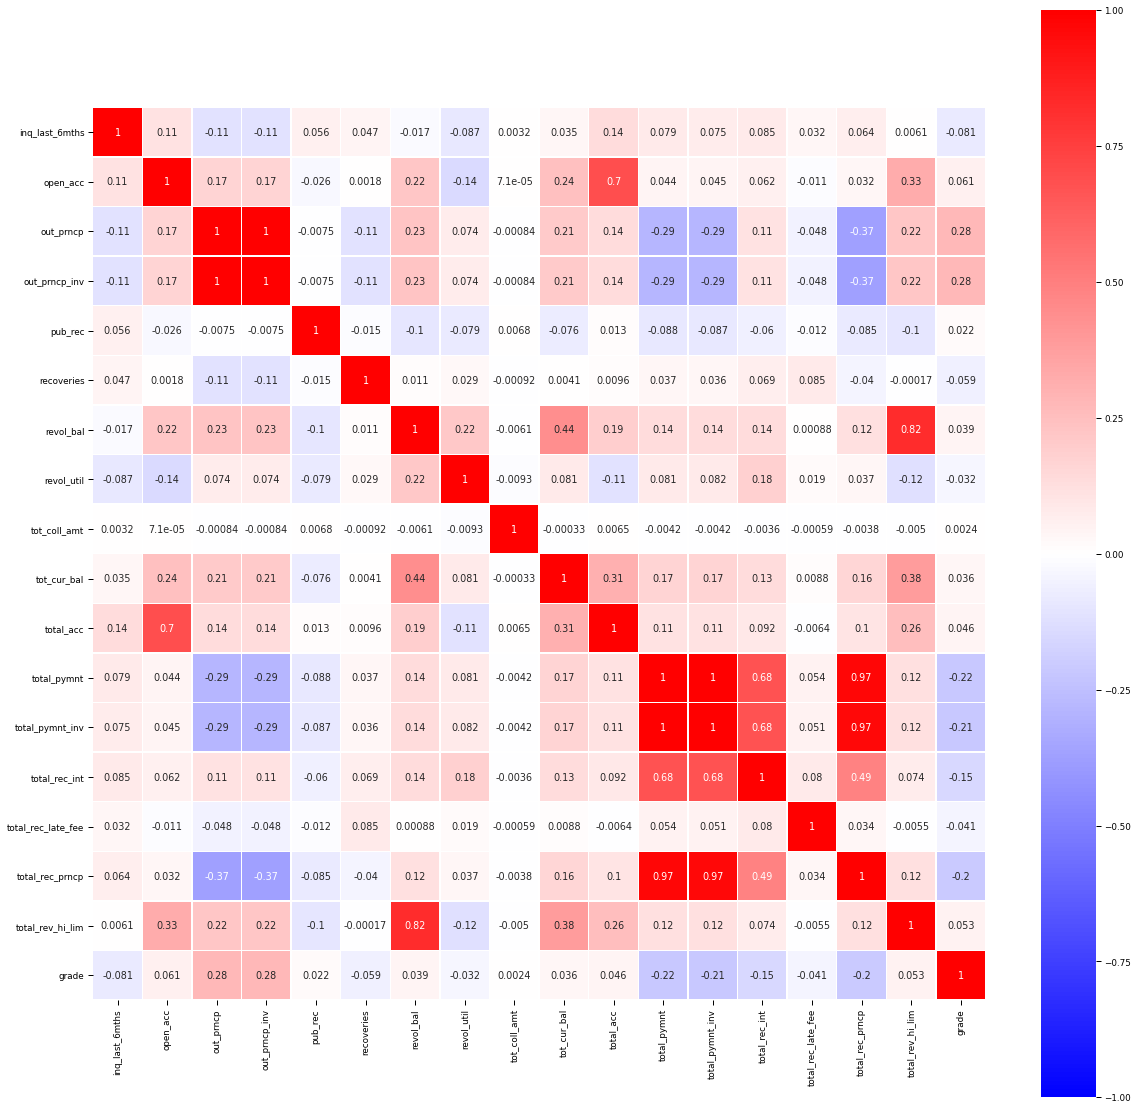

In [ ]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df_LC.assign(grade=df_LC.initial_list_status.astype('category').cat.codes).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)

In [ ]:
df.drop([    'total_acc','total_rev_hi_lim','out_prncp','total_pymnt','total_pymnt_inv'

         
             ], axis=1, inplace=True)

In [ ]:
df.shape

(858718, 32)

In [ ]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'annual_inc', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'initial_list_status', 'out_prncp_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'TARGET', 'purpose_g',
       'region'],
      dtype='object')

In [ ]:
df_LC = df.filter(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'annual_inc','purpose','dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'initial_list_status', 'out_prncp_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'TARGET', 'purpose_g',
       'region'])
df_LC.dtypes

loan_amnt                     float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
emp_length                     object
annual_inc                    float64
purpose                        object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
initial_list_status            object
out_prncp_inv                 float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
last_pymnt_amnt               float64
collections_12_mths_ex_med    float64
application_type               object
acc_now_deli

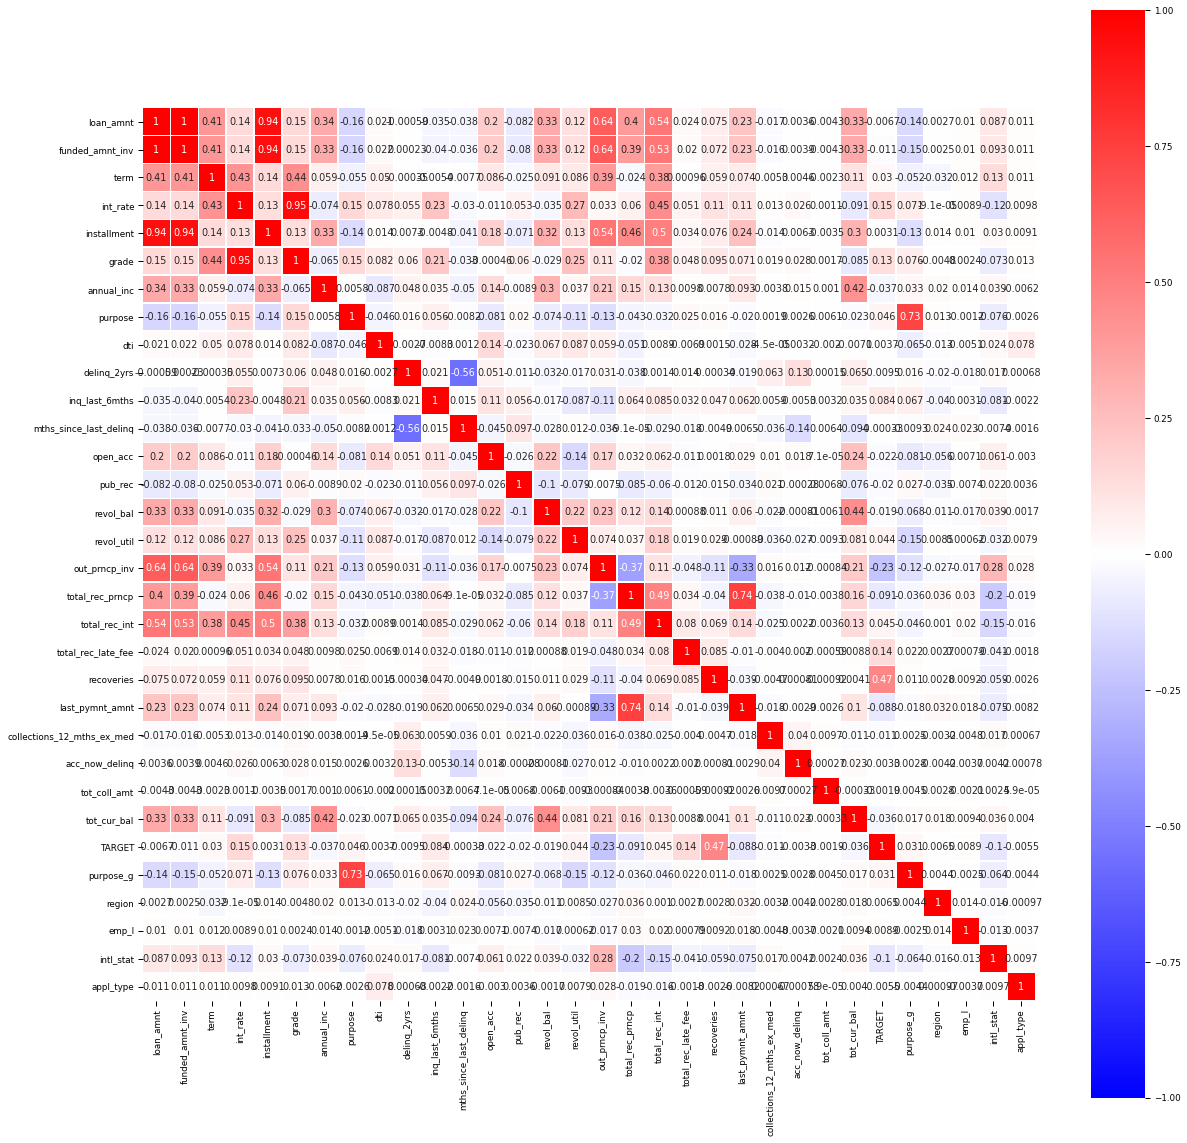

In [ ]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df_LC.assign(grade=df_LC.grade.astype('category').cat.codes,
                         term=df_LC.term.astype('category').cat.codes,
                         emp_l=df_LC.emp_length.astype('category').cat.codes,
                         purpose=df_LC.purpose.astype('category').cat.codes,
                         intl_stat=df_LC.initial_list_status.astype('category').cat.codes,
                        appl_type=df_LC.application_type.astype('category').cat.codes,
                         purpose_g =df_LC.purpose_g.astype('category').cat.codes,
                        region=df_LC.region.astype('category').cat.codes).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)

In [ ]:
df.drop([    'funded_amnt_inv','installment','delinq_2yrs','out_prncp_inv','total_rec_int','last_pymnt_amnt','purpose_g'

         
             ], axis=1, inplace=True)

In [ ]:
df.shape

(858718, 25)

Text(0, 0.5, 'Number of Loans')

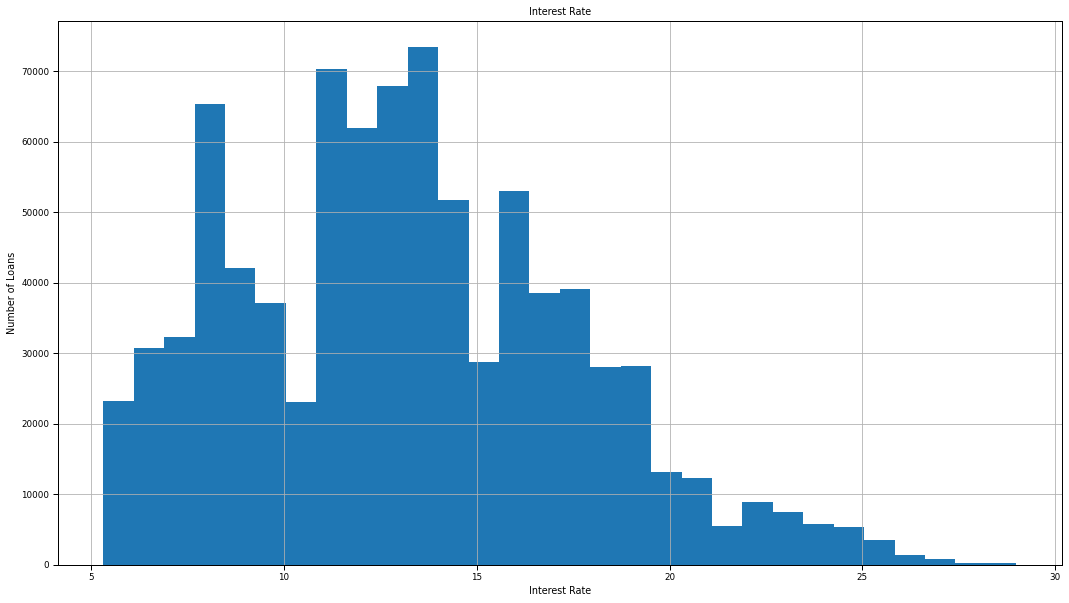

In [ ]:
fig = df.int_rate.hist(bins=30, figsize = (18,10))
fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

Text(0, 0.5, 'Number of Customers')

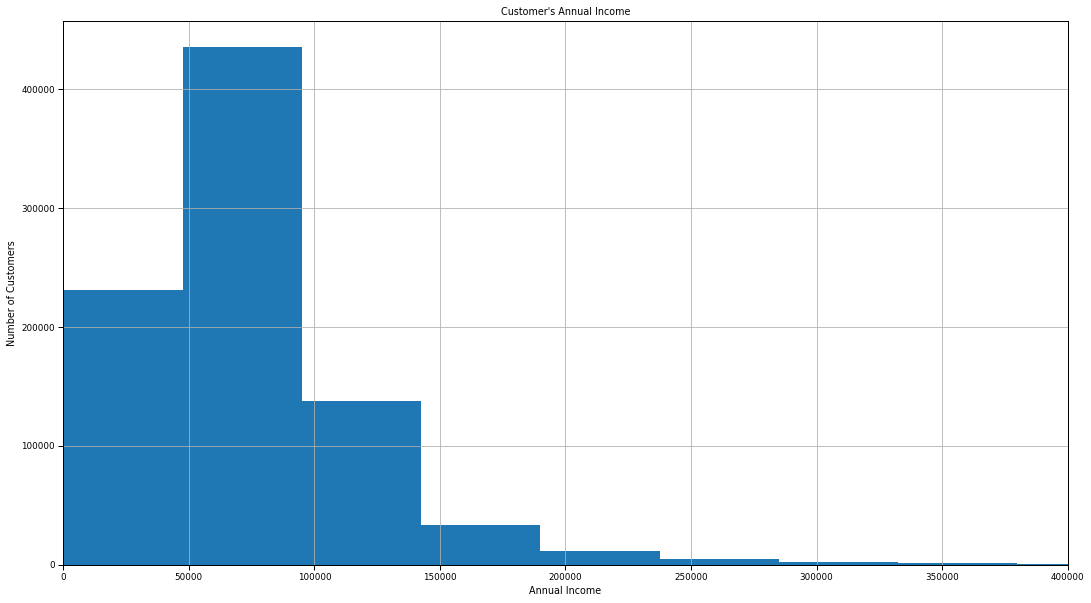

In [ ]:
fig = df.annual_inc.hist(bins=200, figsize = (18,10))
fig.set_xlim(0, 400000)
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

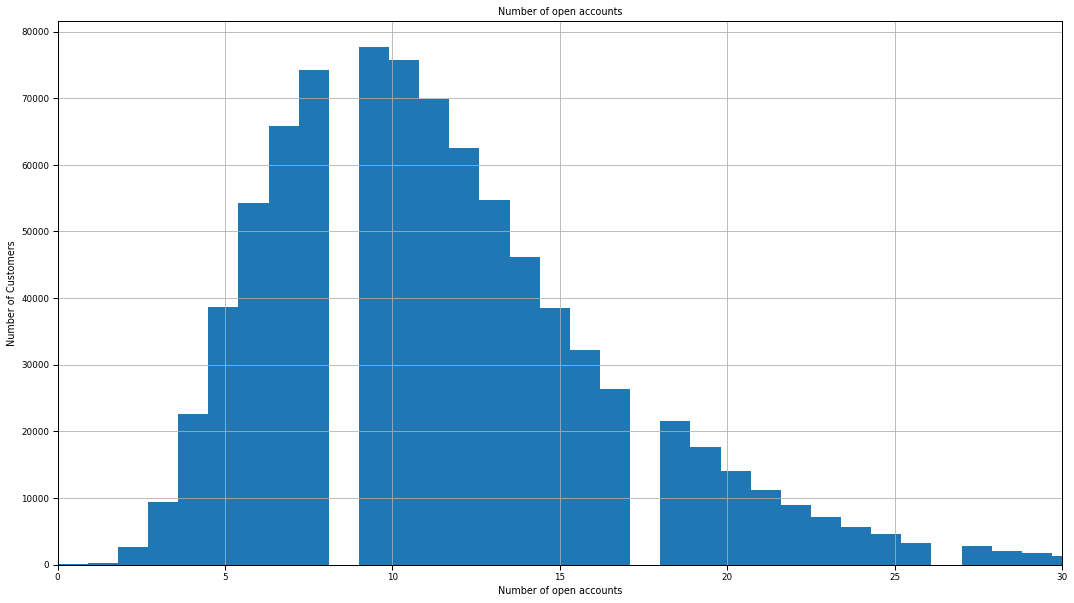

In [ ]:
fig = df.open_acc.hist(bins=100, figsize = (18,10))
fig.set_xlim(0, 30)
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')

Text(0, 0.5, 'Number of Customers')

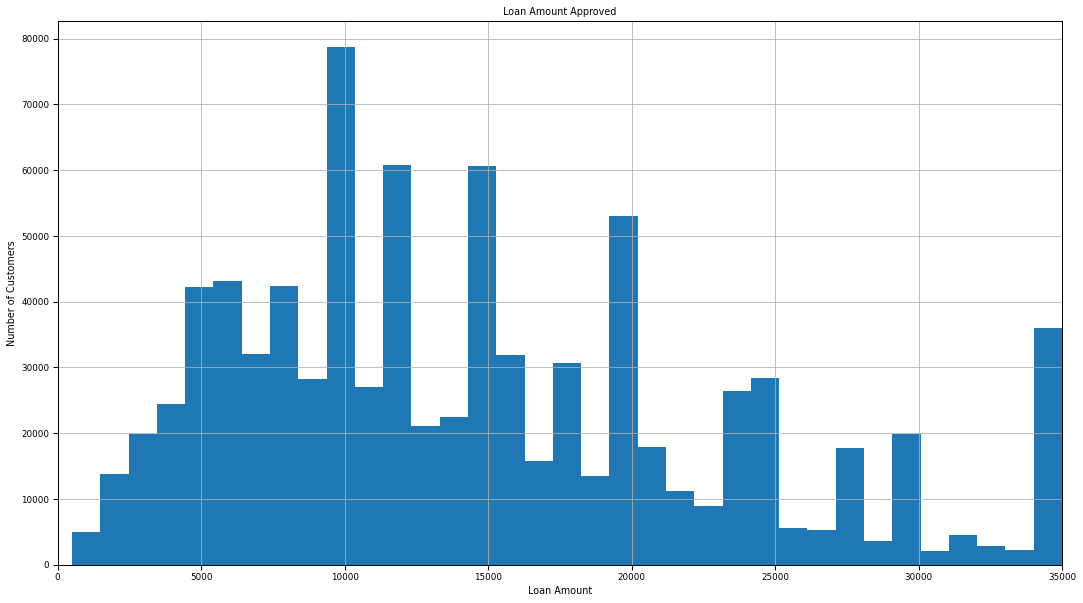

In [ ]:
fig = df.loan_amnt.hist(bins=35, figsize = (18,10))
fig.set_xlim(0, 35000)
fig.set_title("Loan Amount Approved")
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Customers')

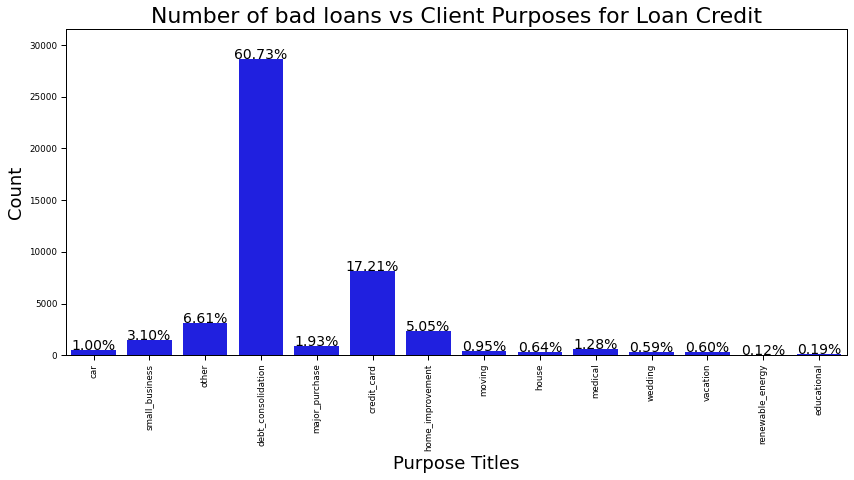

In [ ]:
df_loan = df[(df.TARGET == 1)]
total = len(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=df_loan, 
                  color='blue')
g.set_title("Number of bad loans vs Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}%'.format(height/len(df_loan)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=90)

plt.show()

In [ ]:
#Trying to code this for rates instead of distributions - Added by Vitaly
df_loan = df[(df.TARGET == 1)]
df_rate = df_loan.div(df) 
total = len(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=df_rate,
                  color='blue')
g.set_title("Number of bad loans vs Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
             height + 3,'{:1.2f}%'.format(height/len(df_loan)*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=90)

plt.show()


#Trying to code this for rates instead of distributions - Added by Vitaly

total = len(df)
df_rate = df_loan.div(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='grade', data=df_rate, 
                  hue='TARGET')
g.set_title("", fontsize=22)
g.set_xlabel("Grade of Loans", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=0)

plt.show()

TypeError: ignored

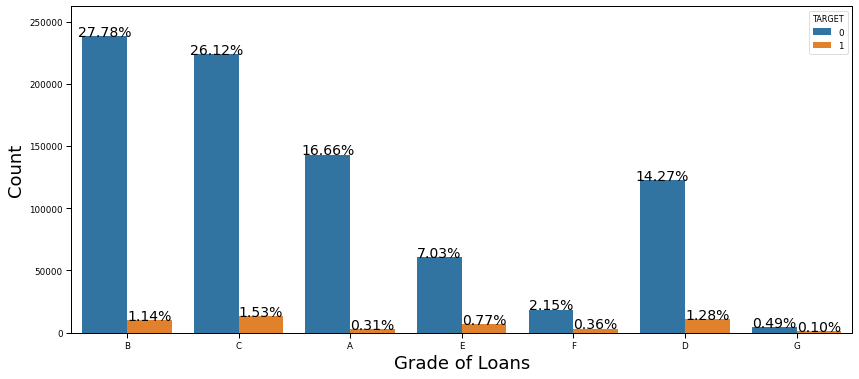

In [ ]:
total = len(df)
plt.figure(figsize=(14,6))

g = sns.countplot(x='grade', data=df, 
                  hue='TARGET')
g.set_title("", fontsize=22)
g.set_xlabel("Grade of Loans", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=0)

plt.show()

Text(0, 0.5, 'Interest Rate')

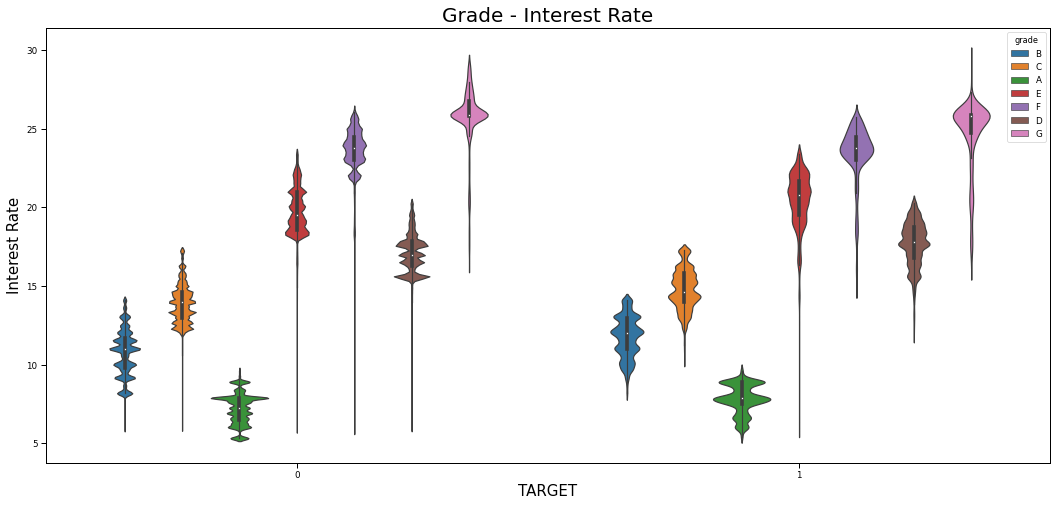

In [ ]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(x="TARGET",y="int_rate",data=df, hue="grade")
plt.title("Grade - Interest Rate", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15)

Text(0, 0.5, 'Data type')

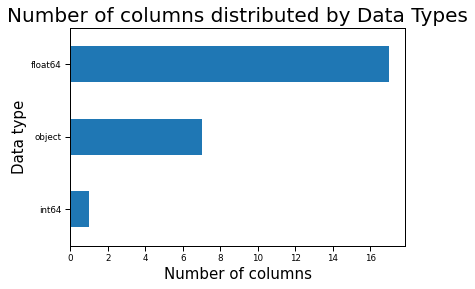

In [ ]:
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

Text(0.5, 1.0, 'Distribution of Interest Rate')

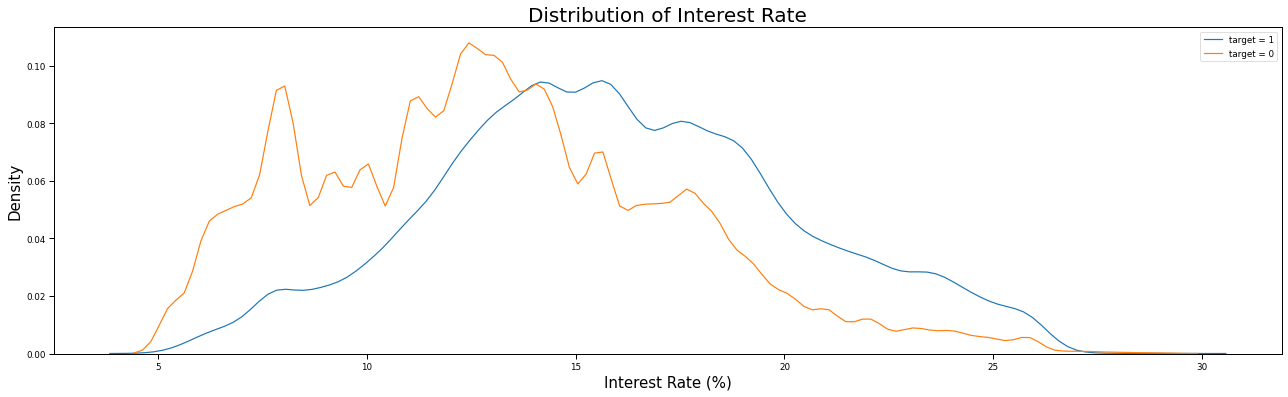

In [ ]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20)

Text(0, 0.5, 'Loan Amount')

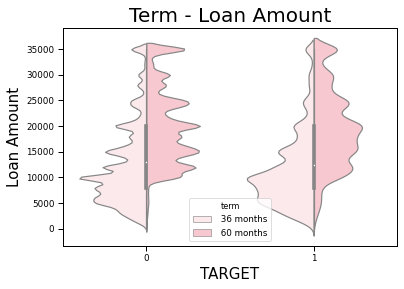

In [ ]:
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="term", split=True,color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15)

Text(0, 0.5, 'Loan Amount')

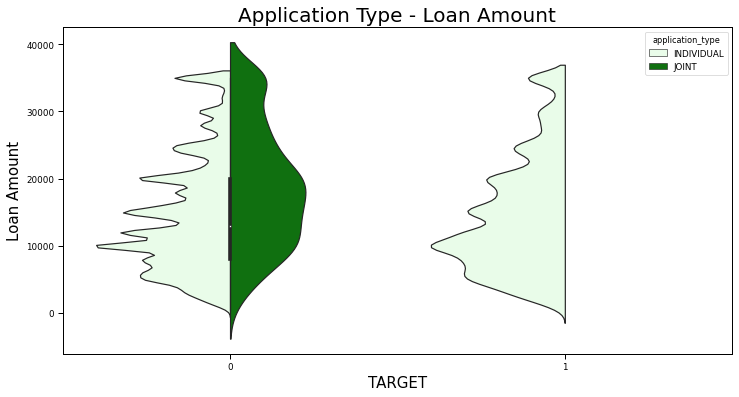

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="application_type", split=True,color='green')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15)

In [ ]:
df.drop(['grade'], axis=1, inplace=True)

In [ ]:
from sklearn import preprocessing
count = 0
for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
initial_list_status
application_type
3 columns were label encoded.


In [ ]:
df = pd.get_dummies(df)
print(df.shape)

(858718, 51)


In [ ]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median())

In [ ]:
df.dropna(inplace=True)

In [ ]:
good_loan =  len(df[(df.TARGET == 0)]) 
print('Good/Bad Loan Ratio: %.2f%%'  % (good_loan/len(df)*100))

Good/Bad Loan Ratio: 95.38%


In [ ]:
#df.to_csv(r'/content/drive/Shared drives/OPIM 5512 - Python Project/cleaned_loan_new.xlsx', index = False)